In [623]:
%reset -f
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [624]:
import sys
sys.path.append('../')

In [625]:
import os
import sys
import pickle
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import targprop.datasets as ds
import targprop.operations as ops
import targprop.tprop_train as tprop

import tensorflow as tf

In [626]:
def lint():
  return [(layers+1)*[None] for i in range(num_steps)]

In [642]:
def mg(dim, num_examples=101):
  if dim>0:
    return np.stack(np.meshgrid(*(dim*[np.linspace(-5, 5, num_examples)]))).reshape(dim, -1)
  else:
    return []

In [643]:
lin = ops.linear()
tanh = ops.tanh()

In [644]:
# dimensions
num_steps = 1
l_dim = [1, 2, 1]
layers = len(l_dim) - 1

# params
W = lint()
for l in range(1, layers+1):
  W[0][l] = np.random.randn(l_dim[l-1], l_dim[l])

# inputs
num_examples = 11

x0 = mg(l_dim[0], num_examples).T

In [645]:
x = lint()
x[0][0] = x0
x[0][1] = lin.f(x0, W[0][1])
x[0][2] = lin.f(x[0][1], W[0][2])

In [652]:
def tf_rinv_aug(y, x_0, func, gamma=1e-2, lr=0.1, num_steps=10):
  y = y.astype('float32')
  x_0 = x_0.astype('float32')
  g = tf.Graph()
  
  inner_steps = 20
  
  #x_val = [100*[None] for i in range(num_steps)]
  x_val = np.zeros((inner_steps, num_steps) + x_0.shape)
  u_val = np.zeros((num_steps,) + x_0.shape)
  res_val = np.zeros((inner_steps, num_steps) + y.shape)
  
  with g.as_default():
    #x_val = np.random.randn(*x_0.shape)
    x = tf.Variable(np.zeros(x_0.shape).astype('float32'))
    u = tf.Variable(np.zeros(x_0.shape).astype('float32'))
    #L = gamma*0.5*tf.reduce_sum((func(x) - y + u)**2.) + tf.reduce_mean((x - x_0)**2.)
    L = tf.nn.l2_loss(x-x_0) + tf.reduce_sum(tf.mul(u, func(x) - y)) + gamma*tf.nn.l2_loss(func(x) - y)
    #L = tf.reduce_mean(gamma*0.5*(func(x) - y + u)**2. + (x - x_0)**2.)
    optx = tf.train.RMSPropOptimizer(lr).minimize(L, var_list=[x])
    optu = tf.train.GradientDescentOptimizer(gamma).minimize(-L, var_list=[u])
    resid = func(x) - y
    
    with tf.Session() as sess:
      sess.run(tf.global_variables_initializer())
      f_val = sess.run(L)
      for j in range(num_steps):
        for i in range(inner_steps):
          sess.run(optx)
          x_val[i,j,:] = sess.run(x)
          res_val[i,j,:] = sess.run(resid)
        sess.run(optu)
        u_val[j,:] = sess.run(u)
      return x_val, u_val, res_val
    

In [653]:
def func(inp):
  return tf.matmul(inp, W[0][2].astype('float32'))

In [654]:
x0_in = x[0][1]
x0_in_c = x0_in + 5.2*np.random.randn(*x0_in.shape)
y_in = x[0][2]

In [660]:
xval, uval, rval = tf_rinv_aug(y_in, x0_in_c, func,
                               gamma=0.1,
                               lr=0.1,
                               num_steps=1000)

In [661]:
xval = np.reshape(xval, (-1,)+xval.shape[-2:], order='F')
rval = np.reshape(rval, (-1,)+rval.shape[-2:], order='F')

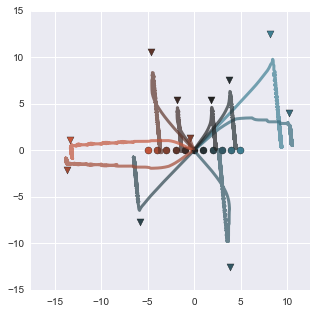

In [662]:
plt.figure(figsize=(5,5))
cmap = sns.color_palette('coolwarm', n_colors=xval.shape[1])
cmap = sns.diverging_palette(220, 20, n=xval.shape[1], center='dark')
for ex in range(x0_in.shape[0]):
  plt.scatter(x0_in[ex,0], x0_in[ex,1], s=50, c=cmap[ex])  
  plt.scatter(x0_in_c[ex,0], x0_in_c[ex,1], marker='v', s=50, c=cmap[ex])
  plt.plot(xval[:,ex,0], xval[:,ex,1], linewidth=3, alpha=0.7, c=cmap[ex])
#   for i in range(xval.shape[0]):
#     plt.scatter(xval[i,ex,0], xval[i,ex,1], s=30, alpha=0.1, c=cmap[ex])
plt.axis('equal')
plt.show()

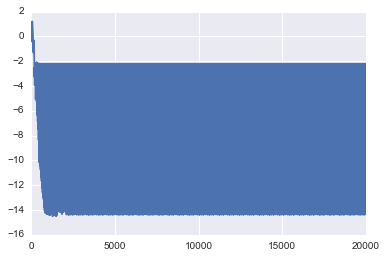

In [659]:
plt.plot(np.log(np.linalg.norm(rval[:,:,0], axis=1, keepdims=False)))
plt.show()

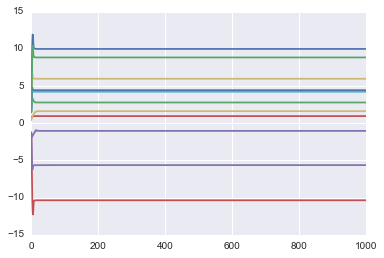

In [658]:
plt.plot(uval[:,:,0])

In [273]:
# init
W = lint() 
x = lint()

L = lint()

p = lint()

Wt = lint()
xt = lint()
pt = lint()

In [97]:
# init
for l in range(1, layers+1):
  W[0][l] = np.random.randn(l_dim[l-1], l_dim[l])

In [100]:
t = 0
x[t][0] = x0
xt[t][-1] = y

# forward pass
for l in range(1, layers+1):
  x[t][l] = tanh.f( lin.f( x[t][l-1], W[t][l] ) )
  
# set targets...
for l in range(layers, 1, -1):
  

3
2


In [ ]:
op

In [102]:
opt = tf.train.GradientDescentOptimizer(0.1)

In [ ]:
opt.minimize(x)

In [10]:
def train(prop_method, gamma=1, num_steps=10, alpha=0.5):
  
  layers = 2
  l_dim = [1, 2, 1]
  
  def lint():
    return [(layers+1)*[None] for i in range(num_steps)]
  
  W = lint()
  x = lint()
  L = lint()
  
  p = lint()
  
  Wt = lint()
  xt = lint()
  pt = lint()
  
  Ws = lint()

  # init
  for l in range(1, layers+1):
    W[0][l] = np.random.randn(l_dim[l], l_dim[l-1])
    
  pt[0][-1] = np.zeros(l_dim[-1], num_examples)
  
  # train
  for t in range(num_steps):

    x[t][0] = x0
    xt[t][-1] = y

    # Fw
    for l in range(1, layers+1):
      x[t][l] = lin.f( W[t][l], x[t][l-1] )

    # targs
    for l in range(layers-1, -1, -1):
      xt[t][l] = lin.f_inv( xt[t][l+1].T, x[t][l].T, W[t][l+1].T ).T

    # p
    p[t][-1] = -(x[t][-1] - xt[t][-1])
    for l in range(layers-1, 0, -1):
      p[t][l] = -(x[t][l] - xt[t][l]) + np.dot(W[t][l+1].T, p[t][l+1])
      
    # pt
    pt[t][]
      
    if t < num_steps - 1:
      for l in range(1, layers+1):
        W[t+1][l] = W[t][l] + alpha*np.dot(p[t][l], x[t][l-1].T)
        
    for l in range(1, layers+1):
      L[t][l] = 0.5*np.mean((x[t][l] - xt[t][l])**2)
      
    for l in range(1, layers+1):
      Ws[t][l] = get_subspaces(W[t][l], 1)
      
  return { 'W': W, 'x': x, 'L': L, 'p': p, 'Wt': Wt, 'xt': xt, 'pt': pt, 'Ws': Ws }